In [1]:
import os
import sys
from pathlib import Path
import anndata as ad
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import style
from tqdm import tqdm
style.use('seaborn-white')
os.system('/usr/bin/Xvfb :99 -screen 0 1024x768x24 &')
os.environ['DISPLAY'] = ':99'

%load_ext autoreload
%autoreload 2

(EE) 
Fatal server error:
(EE) Server is already active for display 99
	If this server is no longer running, remove /tmp/.X99-lock
	and start again.
(EE) 


In [ ]:
s = ad.read_h5ad('')

In [2]:
sys.path.insert(0, "/data/suhzhang/BiologyProgram/morpho")
import morpho
sys.path.insert(0, "/data/suhzhang/BiologyProgram/spateo-release2")
import spateo_dev as st_dev

sys.path.insert(0, "../../scripts/")
from utils import *

2023-12-26 16:08:41.464742: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.8/lib64
2023-12-26 16:08:41.464857: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.8/lib64
2023-12-26 16:08:41.464865: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
/home/timer/anaconda3/envs/lyf_Bio_Spateo/lib/python3.8/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.

## Read Mouse Embryo 11.5 data

In [3]:
data_folder = "../../datasets/Mouse_embory_11.5_new/E115.cellbin_SpatialDomain_20230803/"
import os
dirs = os.listdir(data_folder)
files = []
for dir in dirs:
    if os.path.splitext(dir)[1] == ".h5ad":
        files.append(dir)
def extract_number(filename):
    return int(filename.split("_")[0][1:])
sorted_files = sorted(files, key=extract_number)
files = sorted_files

In [4]:
import pandas as pd
df = pd.read_pickle("./generated_models/correct_rigid_global_zcorrect.pkl")

In [7]:
df[df['slice_ids'] == 'S01'][['points_x','points_y','points_z']].values[:,:2]

array([[ 804.61631051, 1205.68713249],
       [ 803.94040719, 1202.33801139],
       [ 805.636269  , 1202.50329459],
       ...,
       [1615.76303902,  596.8449694 ],
       [1619.24228707,  601.6944567 ],
       [1621.53025094,  603.87194694]])

In [8]:
slices = []
palette = {}
for index, f in tqdm(enumerate(files)):
    s = ad.read_h5ad(os.path.join(data_folder,f))
    s_df = df[df['slice_ids'] == f.split("_")[0]]
    del s.X
    palette_new = s.uns['cellbin_SpatialDomain_colors']
    palette.update(palette_new)
    spatial = s_df[['points_x','points_y','points_z']].values
    spatial[:,:2] = 3.8 * spatial[:,:2]
    spatial[:,2] = 4 * spatial[:,2]
    del s.obsm
    del s.uns
    s.obsm['align_spatial_3D'] = spatial
    del s.obsp, s.layers, s.var
    label = s.obs['cellbin_SpatialDomain']
    del s.obs
    s.obs['cellbin_SpatialDomain'] = label
    slices.append(s)

84it [05:33,  3.97s/it]


In [15]:
for i, s in enumerate(slices):
    s.obs_names = 'slice_{}_'.format(i) + s.obs_names

In [17]:
MouseEmbory11 = ad.concat(slices, axis=0, join='inner', label='batch')

In [30]:
np.save('./generated_models/MouseEmbryo_11.5_new_palette.npy', palette, allow_pickle=True)

In [31]:
palette_9 = np.load('./generated_models/MouseEmbryo_9.5_palette.npy', allow_pickle=True).item()

In [32]:
palette_9

{'Blood': '#ff4500',
 'Liver': '#fa8072',
 'Hindbrain': '#9aff9a',
 'Otic vesicle': '#800000',
 'Notochord': '#febbef',
 'Somite': '#ffc1c1',
 'Mesenchyme': '#c71585',
 'Heart': '#ee0000',
 'Surface ectoderm': '#7ccd7c',
 'Tail bud': '#6495ed',
 'Forebrain': '#00ced1',
 'Mesoderm': '#836fff',
 'Gut tube': '#cd0000',
 'Mid_Hindbrain': '#698b22',
 'Neural crest': '#c1ffc1',
 'NA': '#ffffff',
 'Midbrain': '#00ffff',
 'Spinal cord': '#ff69b4'}

In [20]:
palette

{'Blood': '#ff4500',
 'Dermomyotome': '#ff69b4',
 'Epithelial': '#febbef',
 'Ganglion': '#c1ffc1',
 'Heart & Blood': '#cd0000',
 'Jaw': '#ffff00',
 'Liver': '#ee0000',
 'Mesenchyme': '#ff8000',
 'Mesoderm': '#1e90ff',
 'NA': '#ffffff',
 'NPM': '#8b4726',
 'PNS': '#ffa500',
 'Sclerotome': '#cd853f',
 'Surface ectoderm': '#ffe4c4',
 'Tail': '#ffd700',
 'Epithelium & Eye': '#c71585',
 'Heart': '#fa8072',
 'Eye': '#800000',
 'Brain': '#9aff9a',
 'Connective tissue': '#cdc673',
 'Epithelium': '#ffc1c1',
 'Gut tube': '#6495ed',
 'Head mesenchyme': '#5d478b',
 'Spinal cord': '#698b22',
 'Notochord': '#00ffff',
 'Dorsal root ganglion': '#7ccd7c',
 'Jaw & Gut tube': '#556b2f',
 'Epithelium & Gut tube': '#836fff',
 'Limb': '#fff68f',
 'Meninges': '#00ced1',
 'Jaw & Mesenchyme': '#cdc1c5'}

In [22]:
slices[0]

AnnData object with n_obs × n_vars = 67437 × 28120
    obs: 'cellbin_SpatialDomain'
    obsm: 'align_spatial_3D'

In [23]:
MouseEmbryo = ad.concat(slices, join="inner")

/home/timer/anaconda3/envs/lyf_Bio_Spateo/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning:

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.



In [25]:
MouseEmbryo

AnnData object with n_obs × n_vars = 7830602 × 21751
    obs: 'cellbin_SpatialDomain'
    obsm: 'align_spatial_3D'

In [45]:
MouseEmbryo.obs['cellbin_SpatialDomain'][7830601]

'Meninges'

In [34]:
df_save = pd.DataFrame({'cellbin_SpatialDomain': MouseEmbryo.obs['cellbin_SpatialDomain'], 'points_x': MouseEmbryo.obsm['align_spatial_3D'][:,0], 'points_y': MouseEmbryo.obsm['align_spatial_3D'][:,1], 'points_z': MouseEmbryo.obsm['align_spatial_3D'][:,2]}, columns=['cellbin_SpatialDomain', 'points_x','points_y','points_z'])

In [42]:
df_save

,cellbin_SpatialDomain,points_x,points_y,points_z
1,Surface ectoderm,804.616311,1205.687132,305.0
2,Surface ectoderm,803.940407,1202.338011,305.0
3,Surface ectoderm,805.636269,1202.503295,305.0
4,Surface ectoderm,807.012185,1205.980590,305.0
5,Surface ectoderm,806.947731,1208.223387,305.0
...,...,...,...,...
67918,Meninges,1468.478457,106.194917,800.0
67919,Meninges,1483.160097,106.705049,800.0
67921,Meninges,1441.126284,104.669343,800.0
67922,Meninges,1457.222353,104.888887,800.0


In [41]:
df_save['cellbin_SpatialDomain']

1        Surface ectoderm
2        Surface ectoderm
3        Surface ectoderm
4        Surface ectoderm
5        Surface ectoderm
               ...       
67918            Meninges
67919            Meninges
67921            Meninges
67922            Meninges
67923            Meninges
Name: cellbin_SpatialDomain, Length: 7830602, dtype: category
Categories (31, object): ['Blood', 'Brain', 'Connective tissue', 'Dermomyotome', ..., 'Sclerotome', 'Spinal cord', 'Surface ectoderm', 'Tail']

In [46]:
df_save.to_pickle('./generated_models/MouseEmbryo_11.5_new.pkl',compression='gzip')

In [29]:
MouseEmbryo.obs['cellbin_SpatialDomain'].cat.categories

Index(['Blood', 'Brain', 'Connective tissue', 'Dermomyotome',
       'Dorsal root ganglion', 'Epithelial', 'Epithelium', 'Epithelium & Eye',
       'Epithelium & Gut tube', 'Eye', 'Ganglion', 'Gut tube',
       'Head mesenchyme', 'Heart', 'Heart & Blood', 'Jaw', 'Jaw & Gut tube',
       'Jaw & Mesenchyme', 'Limb', 'Liver', 'Meninges', 'Mesenchyme',
       'Mesoderm', 'NA', 'NPM', 'Notochord', 'PNS', 'Sclerotome',
       'Spinal cord', 'Surface ectoderm', 'Tail'],
      dtype='object')

In [22]:
palette = np.load('./generated_models/MouseEmbryo_shared_palette.npy', allow_pickle=True).item()

In [28]:
MouseEmbory11.write_h5ad('./generated_models/MouseEmbory11.h5ad')

In [24]:
MouseEmbryo_pc, _ = st_dev.tdr.construct_pc(
    adata=MouseEmbory11, 
    spatial_key="align_spatial_3D", 
    groupby="cellbin_SpatialDomain", 
    key_added="tissue", 
    colormap=palette,
)

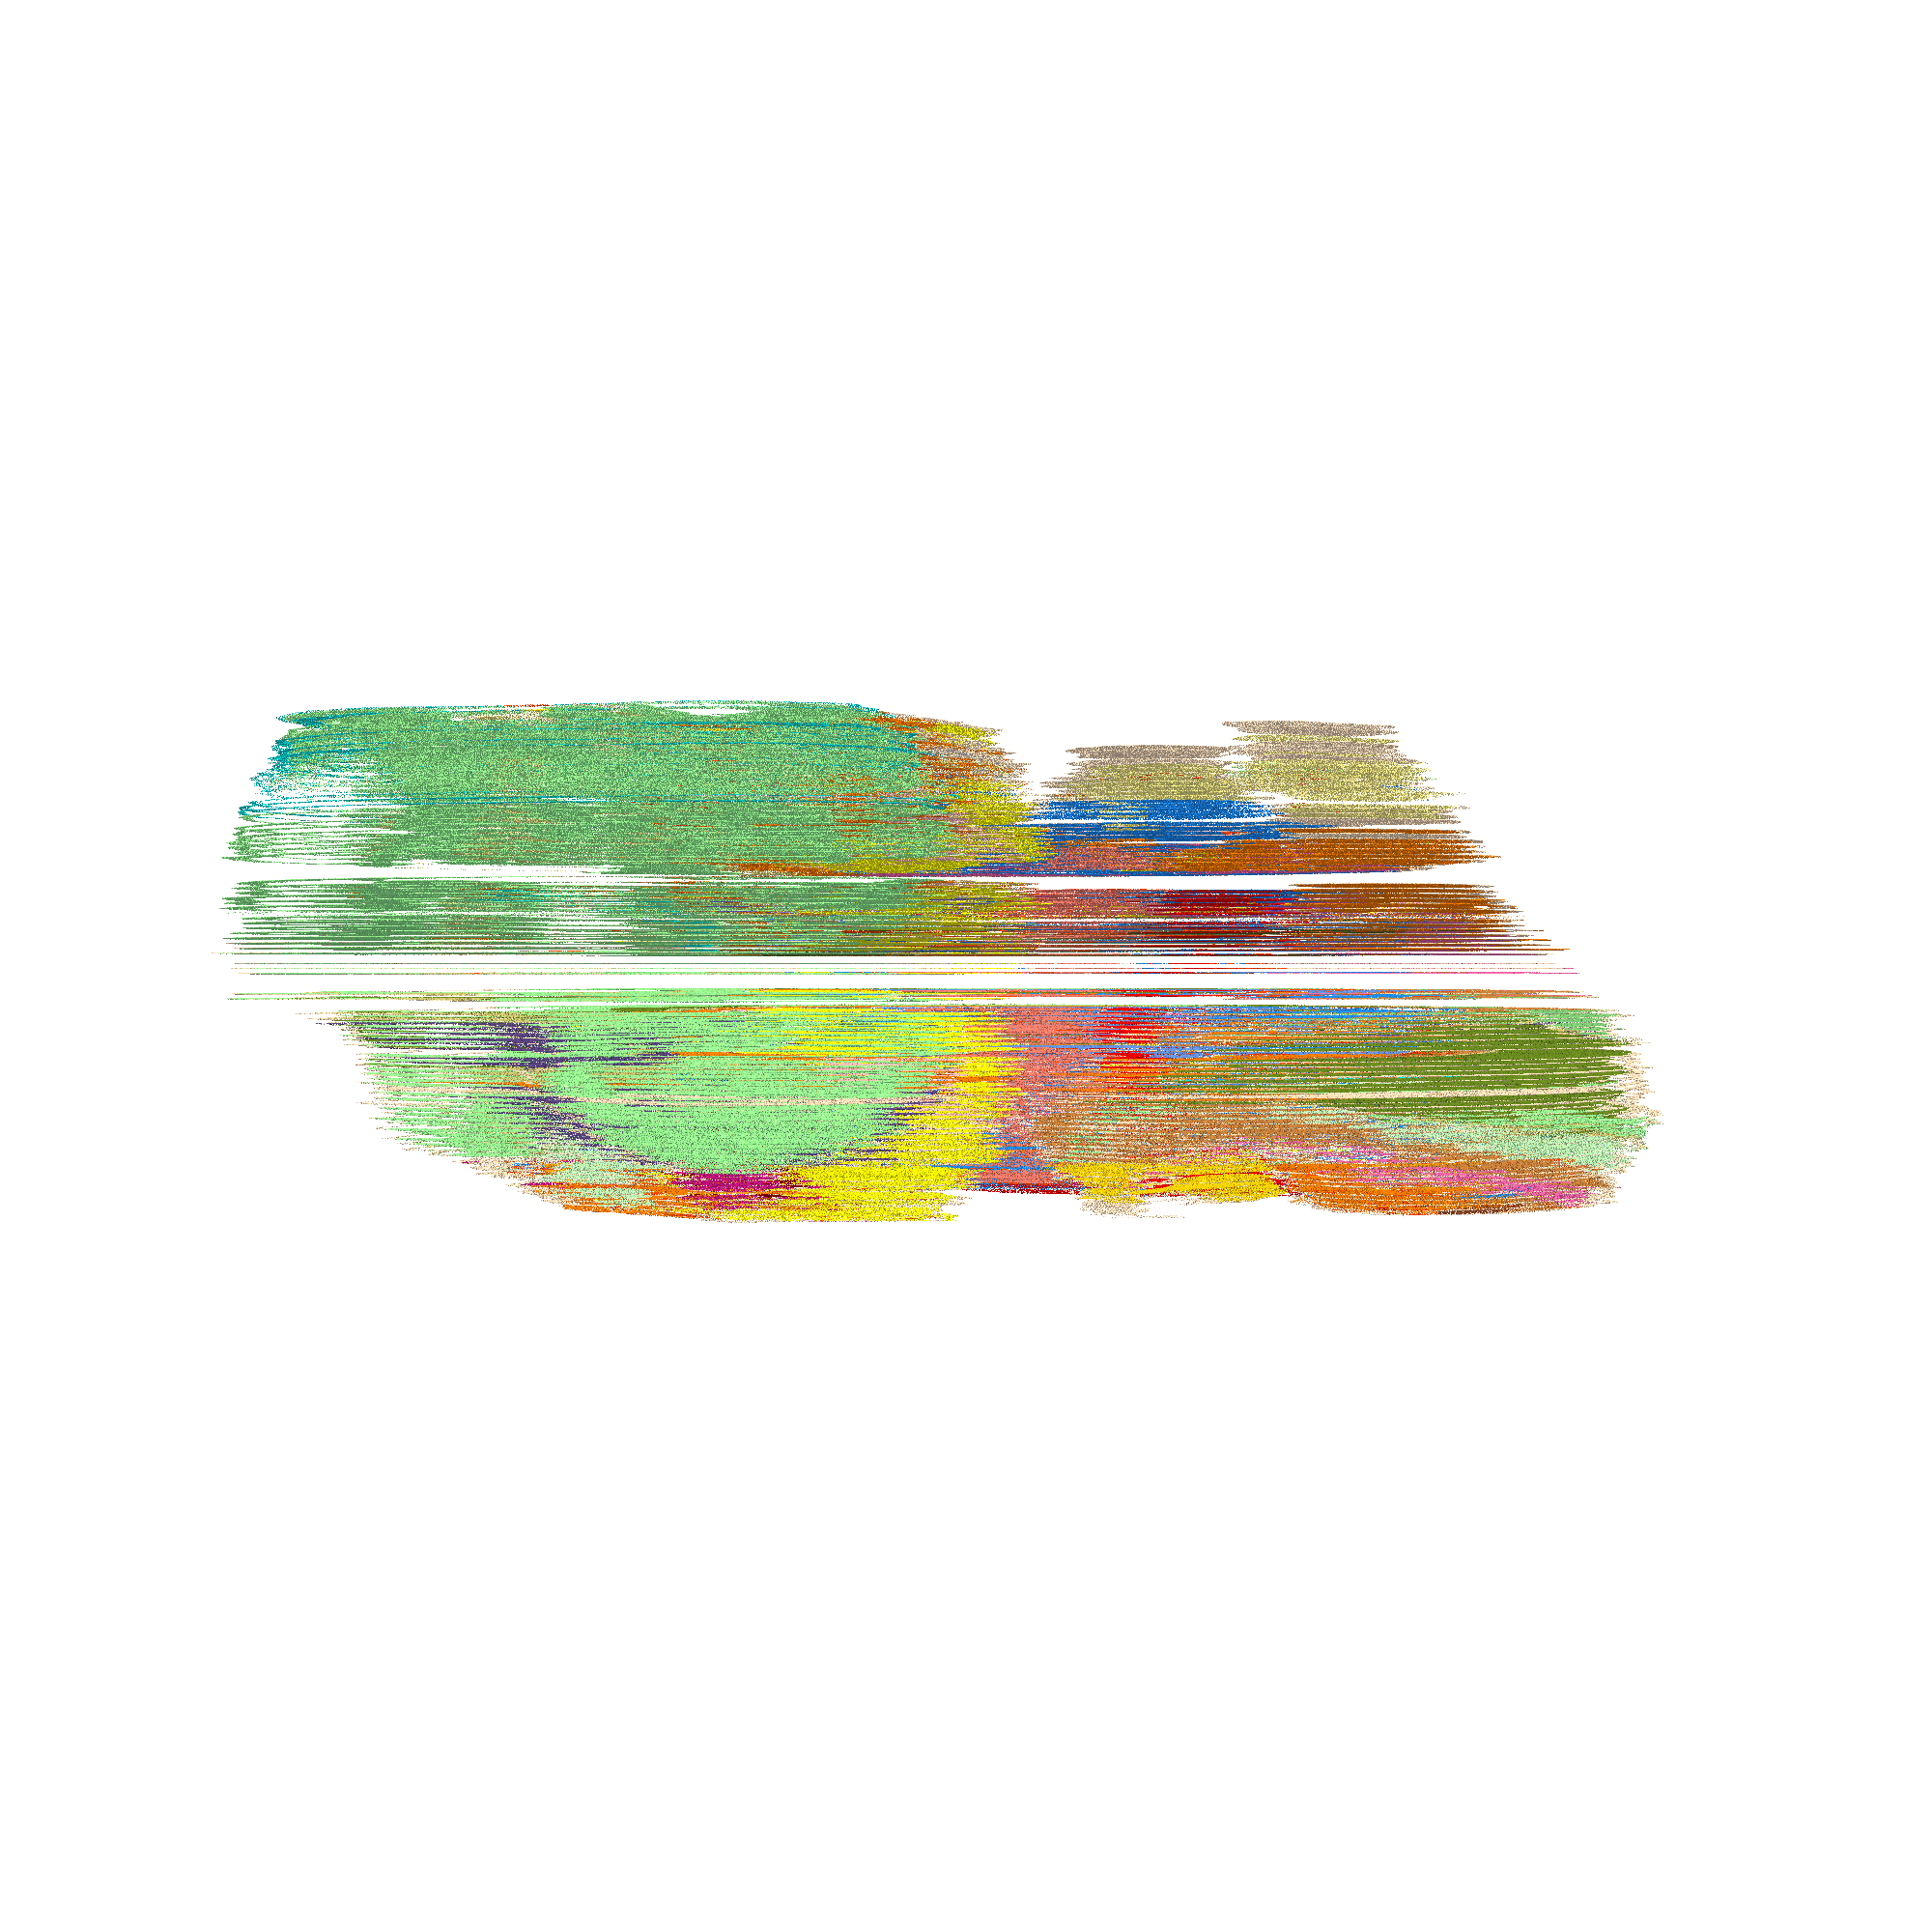

In [27]:
st_dev.pl.three_d_plot(
    model = MouseEmbryo_pc,
    key="tissue", 
    model_style="points", 
    jupyter="static", 
    cpo='yz',
    model_size=1,
    window_size=(2000,2000),
    show_axes=False,
    show_legend=False,
)

In [33]:
MouseEmbryo_pc.save('./generated_models/MouseEmbryo_11.5_new.vtk')